## Chapitre 2 — Optimisation numérique sans contraintes

### 3- Expérimentations sur la Fonction quadratique

$$f(x,y) = x^2 + y^2$$

    
    cette fonction fonction forme une selle hyperbolique (saddle point).
#### Objectifs :
1.  Analyse convexité (Gradient, Hessienne).
2.  Comportement de la descente de gradient à pas fixe.
3.  Implémentation de la méthode à "Pas Optimal" (Recherche linéaire).
4.  Visualisation des descentes pour les methodes a pas fixe et Optimal.

In [10]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Nécessaire pour le pas optimal dans le cas non-quadratique
from scipy.optimize import minimize_scalar 

# Configuration de l'affichage
pd.set_option('display.precision', 6)
plt.rcParams['figure.figsize'] = (10, 8)

### 1. Définition de la fonction et calcul symbolique

Nous utilisons SymPy pour définir la fonction et calculer son gradient et sa Hessienne de manière exacte.

In [2]:
# definition des variables symboliques
x , y = sp.symbols('x y', real = True)

#definir la fonction f(x,y)
f_sym = x**2 - y**2

#caluculeons le gradient symbolique
grad_f_sym = sp.Matrix([sp.diff(f_sym, var) for var in (x,y)])

#calculons la Heissienne
Hes_f_sym = sp.hessian(f_sym,(x,y))

print("Fonction symbolique : ")
display(f_sym)
print("\ngradient symbolique : ")
display(grad_f_sym)
print("\nHessienne symbolique : ")
display(Hes_f_sym)


Fonction symbolique : 


x**2 - y**2


gradient symbolique : 


Matrix([
[ 2*x],
[-2*y]])


Hessienne symbolique : 


Matrix([
[2,  0],
[0, -2]])

## Etude de la fonction

on a $$grad(f)=diag([2x -2y]) $$
on resout :
-  2x = 0 => x=0
- -2y = 0 => y=0

donc le point critique est $$(0,0)$$
### Etude de la Hessiene
$$H[0] = 2  > 0 et det(H) = -4 <0$$
    det(H) etant <0 la Hessiene est indefinie ( ni convexe ni concave) 
    $$donc le point (0,0) n'est ni minimum ni maximun , "c'est un pont selle"

### 2. Implémentation numérique

Nous convertissons ces expressions symboliques en fonctions Python utilisables avec des vecteurs NumPy $X = [x, y]$. 

In [3]:
#fonction objective numerique
def f_num(X):
    x , y = X[0], X[1]
    return x**2 - y**2

#Gradient numeriques
def grad_f_num(X):
    x , y = X[0] ,X[1]
    #on utiliser les expressions dérivées symboliquement plus haut
    df_dx = 2*x
    df_dy = -2*y
    return np.array([df_dx,df_dy])


#### Test de l'algorithme à pas fixe pour montrer que l'on n'as pas de convergence
Nous testons l'algorithme avec un point de départ  $X_0 = (0, 0)$  qui est :le point selle , un pas $s=0.01$ et une tolérance $\epsilon=10^{-5}$.

In [4]:
def grad_pas_fixe(X0 , s , eps , N_max):
    X= X0
    iteration =[]
    
    for k in range(N_max):
        f_val = f_num(X)
        g = grad_f_num(X)
        norm_g = np.linalg.norm(g)
        
        iteration.append([k,X[0], X[1], f_val, norm_g , s])
        
        #critere d'arret
        if norm_g < eps:
            break
        
        #mise a jour
        X_new = X - s*g
        # Sécurité pour éviter les débordements si le pas est trop grand
        if np.any(np.abs(X_new) > 1e5):
            print(f"Arrêt de sécurité à l'itération {k} : divergence.")
            break
        X = X_new
    return pd.DataFrame(iteration, columns=['k','x_k','y_k','f(X_k)','||grad f(X_k)||', 's'])

In [8]:
X0 = np.array([0.0, 0.0])
s_test = 0.01
eps_test = 1e-5
N_max_test = 1000

df_fixe = grad_pas_fixe(X0, s_test, eps_test, N_max_test)

print(f"Algorithme terminé en {len(df_fixe)} itérations.")
print("Début des itérations :")
display(df_fixe.head())
print("\nFin des itérations :")
display(df_fixe.tail())

Algorithme terminé en 1 itérations.
Début des itérations :


,k,x_k,y_k,f(X_k),||grad f(X_k)||,s
0,0,0.0,0.0,0.0,0.0,0.01



Fin des itérations :


,k,x_k,y_k,f(X_k),||grad f(X_k)||,s
0,0,0.0,0.0,0.0,0.0,0.01


## commentaire

Donc on voit bien que au point (0,0) qui est le point selle , la methode de gradient quelque soit le pas ( pas fixe ou optimal) ne marche ras pas car :

    dans une direction la courbe descent ( l'axe x convrege vers 0)
    dans l'autre elle monte ( l'axe y diverge vers +infinity)

donc le gradient en (0,0) s'arrete  , c'est un point d'equilibre instable

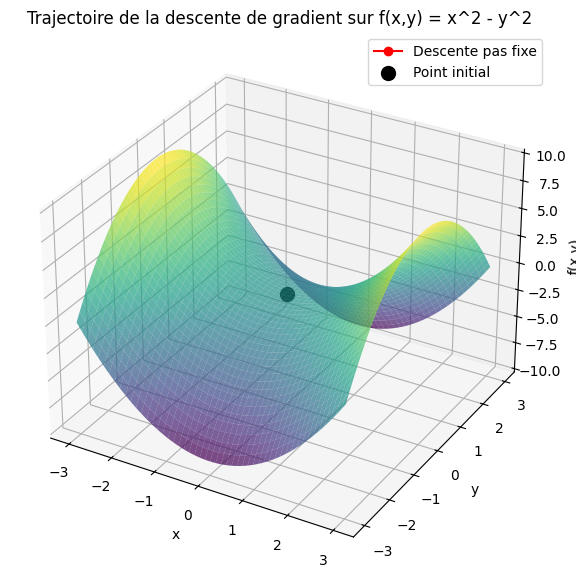

In [ ]:

# --- Grille pour la surface ---
x_vals = np.linspace(-3, 3, 200)
y_vals = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2 - Y**2

# --- Surface 3D ---
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# --- Trajectoire de la descente de gradient ---
Z_traj = df_fixe['x_k']**2 - df_fixe['y_k']**2
ax.plot(df_fixe['x_k'], df_fixe['y_k'], Z_traj, color='red', marker='o', label='Descente pas fixe')

# --- Point initial ---
ax.scatter(df_fixe['x_k'].iloc[0], df_fixe['y_k'].iloc[0],
           df_fixe['x_k'].iloc[0]**2 - df_fixe['y_k'].iloc[0]**2,
           color='black', s=100, label='Point initial')

# Labels et titre
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Trajectoire de la descente de gradient sur f(x,y) = x^2 - y^2')
ax.legend()
plt.show()
